# Prova Final


## Estatística para Ciência de Dados

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**

A diabetes é uma doença causada pela produção insuficiente ou má absorção de insulina, hormônio que regula a glicose no sangue e garante energia para o organismo. Em um estudo, 150 pacientes com diabetes ou pré-diabetes receberam acompanhamento por 2 anos e em seguida foram coletadas informações básicas: idade, sexo, índice de massa corporal, pressão arterial média e uma medida de soro sanguíneo, além da medida de hemoglobina glicada e a classificação se o indivíduo tem ou não diabetes após o acompanhamento. A listagem das variáveis disponíveis é dada a seguir

- 'Idade', em anos completos;
- 'Sexo' (1 se feminino, 0 se masculino);
- 'IMC': Índice de massa corporal;
- 'PAM': Pressão arterial média;
- 'S': uma medida de soro sanguíneo;
- 'Y': hemoglobina glicada;
- 'diabetes': 1, se o paciente desenvolveu diabetes e 0, caso contrário;

Atenção: 'Y' e 'diabetes' são ambas variáveis-resposta, uma contínua e uma categórica, e não devem ser usadas como variáveis preditoras.

Os dados estão disponíveis em https://raw.githubusercontent.com/cibelerusso/Datasets/main/diabetes.csv


1. Investigue a associação de cada uma das variáveis com a resposta 'Y' com uma **análise exploratória de dados** via matriz de gráficos de dispersão e matriz de correlações, para verificar a associação entre as variáveis. Comente os resultados obtidos.



2. Ajuste um **modelo de regressão linear** com intercepto, com resposta 'Y' e todas as variáveis preditoras: 'Idade', 'Sexo', 'IMC', 'PAM' e 'S'. Considerando o valor-p (P>|t|), indique as duas preditoras com maior significância estatística marginal neste modelo e interprete seus coeficientes.



3. Faça uma **análise descritiva dos dados**. Qual o percentual de pacientes de cada sexo que desenvolveu e não desenvolveu diabetes? Investigue a associação de cada uma das preditoras contínuas com a resposta 'diabetes' via **análise exploratória de dados** para verificar a associação entre as variáveis. Comente os resultados obtidos.



4. Ajuste um **modelo de regressão logística** com intercepto para a resposta 'diabetes' com preditoras 'Idade', 'Sexo', 'IMC', 'PAM' e 'S'. Esse modelo é um MLG com resposta binomial e ligação logito. Avalie como as preditoras 'Idade' e 'IMC' influenciam na resposta 'diabetes' (sugestão: razão de chances, dada neste modelo por $OR = \exp(b_j)$, em que $b_j$ é o coeficiente estimado correspondente à j-ésima preditora).



5. Desenvolva uma análise de pontos de alavanca e, caso haja alguma observação em destaque, identifique-a e investigue se ela contém algum comportamento inesperado.  


A entrega deve ser feita com um notebook executado no formato .ipynb, com os códigos usados para a obtenção dos resultados. O notebook deve ser comentado de forma a facilmente identificar os códigos de cada análise. Alguns códigos de apoio são fornecidos abaixo, para a leitura dos dados e para iniciar as suas análises. Procure utilizar bibliotecas Python abordadas na disciplina.

Para esta aplicação, considere que não é necessário fazer mais nenhuma seleção de atributos ou dividir a base em treinamento e teste.

Atenção: se constatado plágio, a questão será zerada.




## Carregamento de pacotes e leitura de dados

In [1]:
# Carrega os pacotes
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
caminho = 'https://raw.githubusercontent.com/cibelerusso/Datasets/main/diabetes.csv'
df = pd.read_csv(caminho, sep=';', index_col='ID')
df.head(3)

,Idade,Sexo,IMC,PAM,S,Y,diabetes
ID,,,,,,,
112126,32,0,27.2878,84.9978,6.0216,6.1589,0
897505,43,1,29.5730,82.5959,5.1257,6.9437,1
650952,47,1,24.3119,88.0686,3.4778,7.2397,1


# 1.  Análise exploratória de dados
(Alguns códigos são sugeridos. Inclua outros, se necessário, e responda às perguntas)


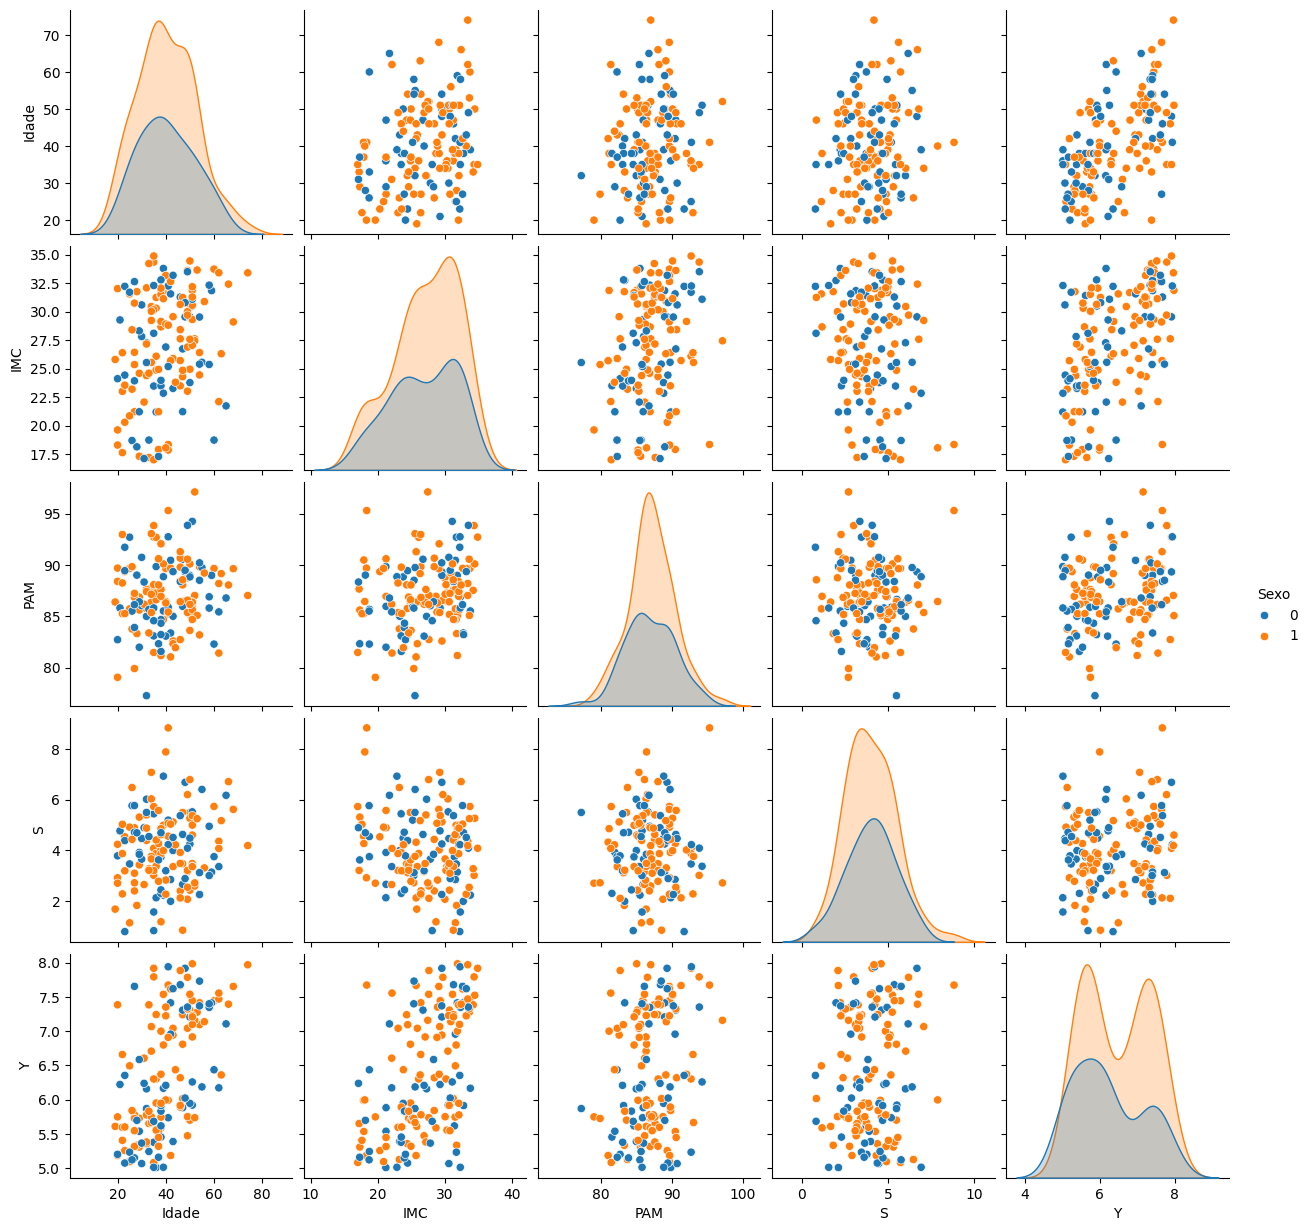

In [3]:
# Sugestão: separar por sexo
sns.pairplot(df.drop('diabetes',axis=1), hue='Sexo');

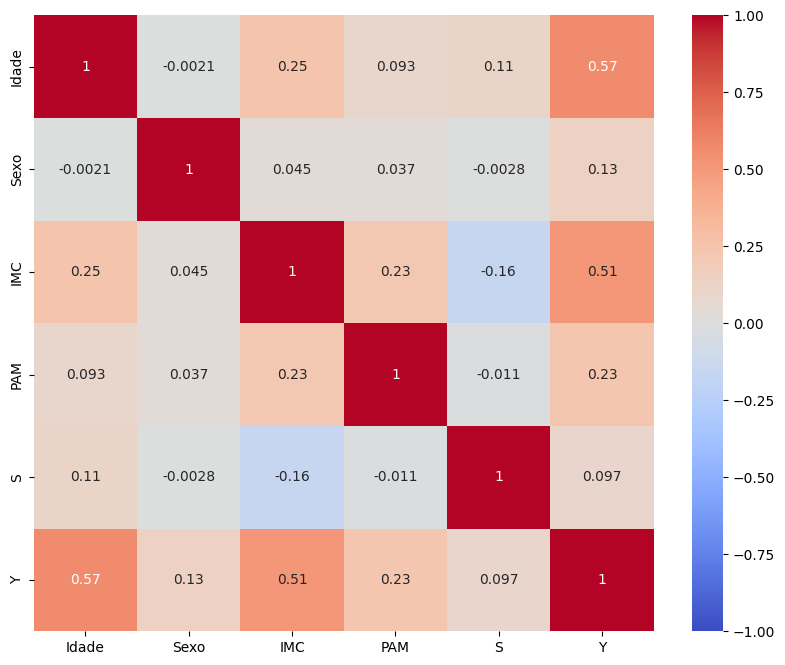

In [4]:
# Matriz de correlações
correlation_matrix = df.drop('diabetes',axis=1).corr();

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

1. Investigue a associação de cada uma das variáveis com a resposta 'Y' com uma análise exploratória de dados via matriz de gráficos de dispersão e matriz de correlações, para verificar a associação entre as variáveis. Comente os resultados obtidos.

- Correlação alta entre IMC e idade
- Correlação baixa com 'S' (uma medida de soro sanguíneo) e o target
- As classes estão desbalanceadas. Muito mais mulheres homens
- Sexo não parece ser uma variável que pesa 

In [5]:
df['Sexo'].value_counts(normalize=True)

Sexo
1    0.64
0    0.36
Name: proportion, dtype: float64

# 2. Modelo de regressão linear
(Alguns códigos são sugeridos. Inclua outros, se necessário, e responda às perguntas)


In [6]:
# Modelo de regressão linear
from statsmodels.formula.api import ols

mod = ols('Y ~  Idade + Sexo +  IMC + PAM + S', data=df)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     29.26
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           2.05e-20
Time:                        19:31:57   Log-Likelihood:                -144.22
No. Observations:                 150   AIC:                             300.4
Df Residuals:                     144   BIC:                             318.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1713      1.401      0.122      0.9

Ajuste um modelo de regressão linear com intercepto, com resposta 'Y' e todas as variáveis preditoras: 'Idade', 'Sexo', 'IMC', 'PAM' e 'S'. Considerando o valor-p (P>|t|), indique as duas preditoras com maior significância estatística marginal neste modelo e interprete seus coeficientes.




- Idade e IMC tem maior significancia estatística marginal. Assim como vimos acima


# 3. Análise descritiva e exploratória
(Alguns códigos são sugeridos. Inclua outros, se necessário, e responda às perguntas)

**Análise descritiva**

    Faça uma análise descritiva dos dados. Qual o percentual de pacientes de cada sexo que desenvolveu e não desenvolveu diabetes? Investigue a associação de cada uma das preditoras contínuas com a resposta 'diabetes' via análise exploratória de dados para verificar a associação entre as variáveis. Comente os resultados obtidos.



In [7]:
df.describe()

,Idade,Sexo,IMC,PAM,S,Y,diabetes
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,40.300000,0.640000,27.118157,87.078697,4.017304,6.383655,0.420000
std,11.697387,0.481608,4.807848,3.314999,1.444145,0.901606,0.495212
min,19.000000,0.000000,17.030100,77.266400,0.800400,5.010800,0.000000
25%,32.000000,0.000000,23.855675,85.261550,3.108550,5.613175,0.000000
50%,39.000000,1.000000,27.612400,86.862750,3.958850,6.216600,0.000000
75%,49.000000,1.000000,31.289575,89.359175,4.986000,7.268900,1.000000
max,74.000000,1.000000,34.893300,97.128700,8.836000,7.983600,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 112126 to 358186
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Idade     150 non-null    int64  
 1   Sexo      150 non-null    int64  
 2   IMC       150 non-null    float64
 3   PAM       150 non-null    float64
 4   S         150 non-null    float64
 5   Y         150 non-null    float64
 6   diabetes  150 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 9.4 KB


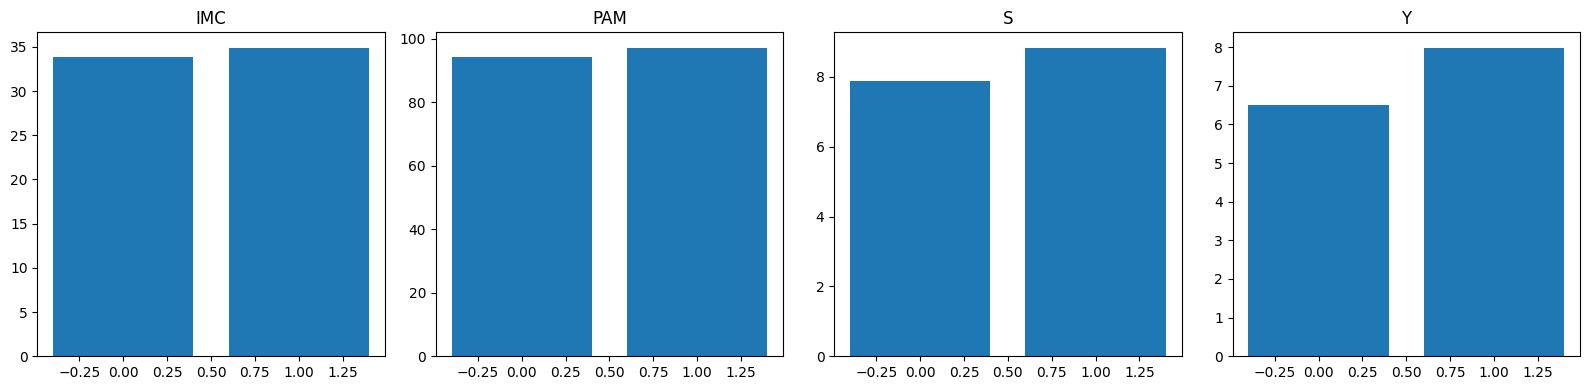

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))  # Ajuste o figsize para acomodar todos os subplots
for i, col in enumerate(df[['IMC', "PAM", "S", "Y"]].columns):
    axs[i].bar(df['diabetes'], df[col])
    axs[i].set_title(col)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show() 

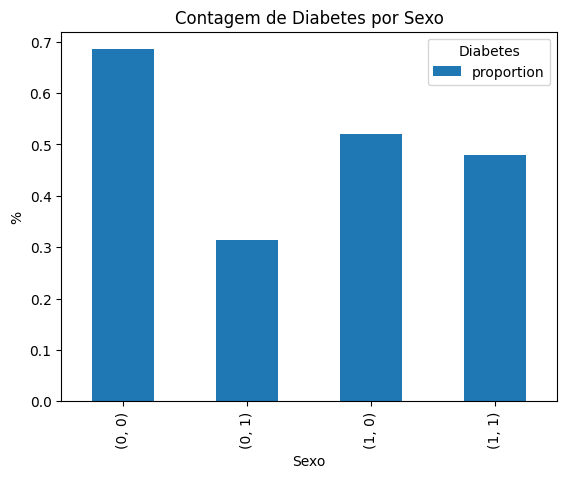

In [11]:
df.groupby('Sexo')['diabetes'].value_counts(normalize=True).plot(kind='bar', stacked=False)

# Adicionamos títulos e rótulos para clareza
plt.title('Contagem de Diabetes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('%')
plt.legend(title='Diabetes')

# Mostramos o gráfico
plt.show()

In [12]:
df['IMC'].unique()


array([27.2878, 29.573 , 24.3119, 34.361 , 26.4282, 25.8211, 26.7472,
       29.5576, 33.8037, 34.8933, 24.6129, 33.7446, 34.2301, 24.9678,
       30.5065, 28.4343, 17.3375, 30.4622, 18.3682, 28.681 , 25.9035,
       31.885 , 24.8718, 30.0147, 24.9   , 31.8558, 25.7149, 26.1058,
       17.8809, 31.684 , 31.7664, 17.2314, 29.1545, 25.5759, 30.6874,
       17.9333, 21.2166, 24.408 , 26.9107, 20.3173, 24.4661, 23.2177,
       31.5732, 25.2054, 18.0749, 30.6061, 23.2838, 34.462 , 31.2598,
       27.6289, 23.4923, 32.3383, 17.0301, 21.2454, 29.5612, 31.5703,
       21.2445, 23.7943, 31.8756, 29.1123, 29.3261, 30.8976, 20.8804,
       18.3183, 29.2883, 27.4593, 32.749 , 27.6337, 24.4512, 30.3176,
       23.515 , 32.0351, 30.1798, 23.041 , 23.9504, 32.1995, 26.9149,
       27.179 , 21.2355, 27.8374, 22.8649, 33.6659, 22.0853, 31.4241,
       30.5777, 27.0699, 25.7271, 29.7109, 26.4496, 28.9232, 18.7569,
       28.3291, 31.5305, 19.6447, 25.3757, 31.1048, 27.5959, 28.4204,
       18.755 , 21.7

In [13]:
bins = [18.5, 24.9, 29.9, 34.9, 39.9, 40]
faixas = ['Baixo peso', 'Peso normal', 'Sobrepeso', 'Obesidade Grau I', 'Obesidade grau II', 'Obesidade Grau III' 'Mais de 55 anos']

df['faixas de IMC'] = pd.cut(df['IMC'], bins=bins, labels=faixas[:-1])


df['faixas de IMC'].value_counts(normalize=True)

# pd.cut(df['IMC'], bins=bins, labels=faixas).value_counts(normalize=True)

faixas de IMC
Sobrepeso            0.398551
Peso normal          0.333333
Baixo peso           0.268116
Obesidade Grau I     0.000000
Obesidade grau II    0.000000
Name: proportion, dtype: float64

C:\Users\feh_s\AppData\Local\Temp\ipykernel_788\1337594842.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('faixas de IMC')['diabetes'].value_counts(normalize=True).plot(kind='bar', stacked=True)


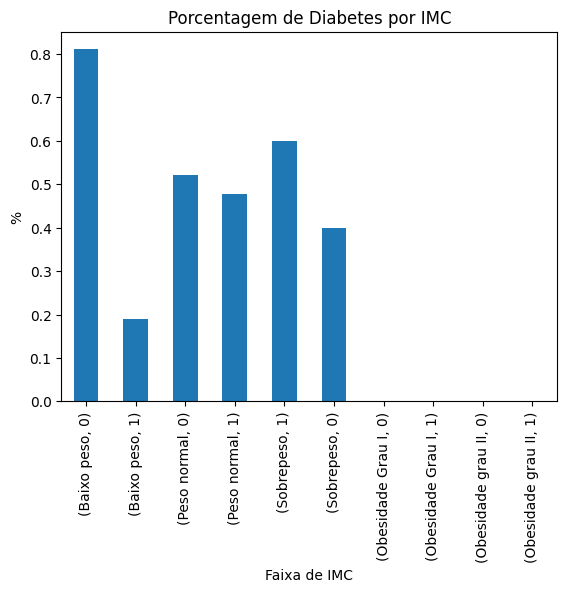

In [14]:
#Pessoas com baico IMC tem menos chance de ter diabetes
df.groupby('faixas de IMC')['diabetes'].value_counts(normalize=True).plot(kind='bar', stacked=True)

# Adicionamos títulos e rótulos para clareza
plt.title('Porcentagem de Diabetes por IMC')
plt.xlabel('Faixa de IMC')
plt.ylabel('%')


# Mostramos o gráfico
plt.show();

In [15]:
def data_frame(col):
    df_grouped = (
        df
        .groupby(col)['diabetes']
        .value_counts(normalize=True)
        .rename('percent')
        .mul(100)
        .reset_index()
        .round(2)
    )
       
    return df_grouped

In [16]:
data_frame('faixas de IMC')

C:\Users\feh_s\AppData\Local\Temp\ipykernel_788\4072576666.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(col)['diabetes']


,faixas de IMC,diabetes,percent
0,Baixo peso,0,81.08
1,Baixo peso,1,18.92
2,Peso normal,0,52.17
3,Peso normal,1,47.83
4,Sobrepeso,1,60.00
5,Sobrepeso,0,40.00
6,Obesidade Grau I,0,0.00
7,Obesidade Grau I,1,0.00
8,Obesidade grau II,0,0.00
9,Obesidade grau II,1,0.00


In [17]:
## Mulheres tem maior tendência de ter diabetes
## Pessoas com sobrepeso tem uma tendência maior em desenvolver diabetes
(
        df
        .groupby(['faixas de IMC', 'Sexo'])['diabetes']
        .value_counts(normalize=True)
        .rename('percent')
        .mul(100)
        .round(2)
    )

C:\Users\feh_s\AppData\Local\Temp\ipykernel_788\2907093572.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['faixas de IMC', 'Sexo'])['diabetes']


faixas de IMC      Sexo  diabetes
Baixo peso         0     0           94.12
                         1            5.88
                   1     0           70.00
                         1           30.00
Peso normal        0     0           53.33
                         1           46.67
                   1     0           51.61
                         1           48.39
Sobrepeso          0     0           52.63
                         1           47.37
                   1     1           66.67
                         0           33.33
Obesidade Grau I   0     0            0.00
                         1            0.00
                   1     0            0.00
                         1            0.00
Obesidade grau II  0     0            0.00
                         1            0.00
                   1     0            0.00
                         1            0.00
Name: percent, dtype: float64

**Análise exploratória de dados**

In [18]:
df['Sexo_nome'] = df['Sexo'].map({ 0: 'masculino', 1: 'feminino'})

df.head()


,Idade,Sexo,IMC,PAM,S,Y,diabetes,faixas de IMC,Sexo_nome
ID,,,,,,,,,
112126,32,0,27.2878,84.9978,6.0216,6.1589,0,Peso normal,masculino
897505,43,1,29.5730,82.5959,5.1257,6.9437,1,Peso normal,feminino
650952,47,1,24.3119,88.0686,3.4778,7.2397,1,Baixo peso,feminino
555951,35,1,34.3610,93.8493,3.0192,7.7926,1,Sobrepeso,feminino
321314,54,1,26.4282,89.8297,2.2501,7.4150,1,Peso normal,feminino


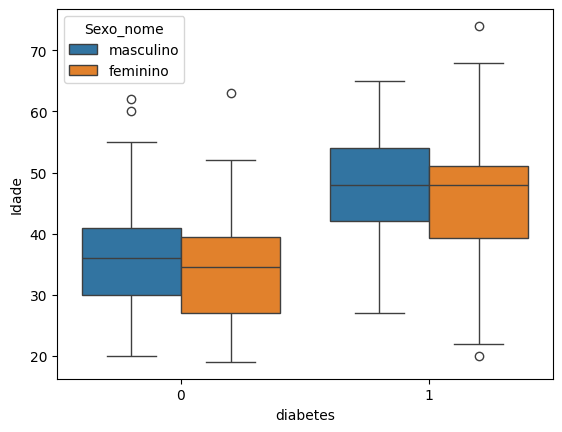

In [19]:
# sugestão: separar por sexo
# Homens tem uma prevalencia maior de diabetes
# Conforme aumenta a idade aumenta também a incidência de diabetes
sns.boxplot(data=df, x='diabetes', y='Idade', hue='Sexo_nome');

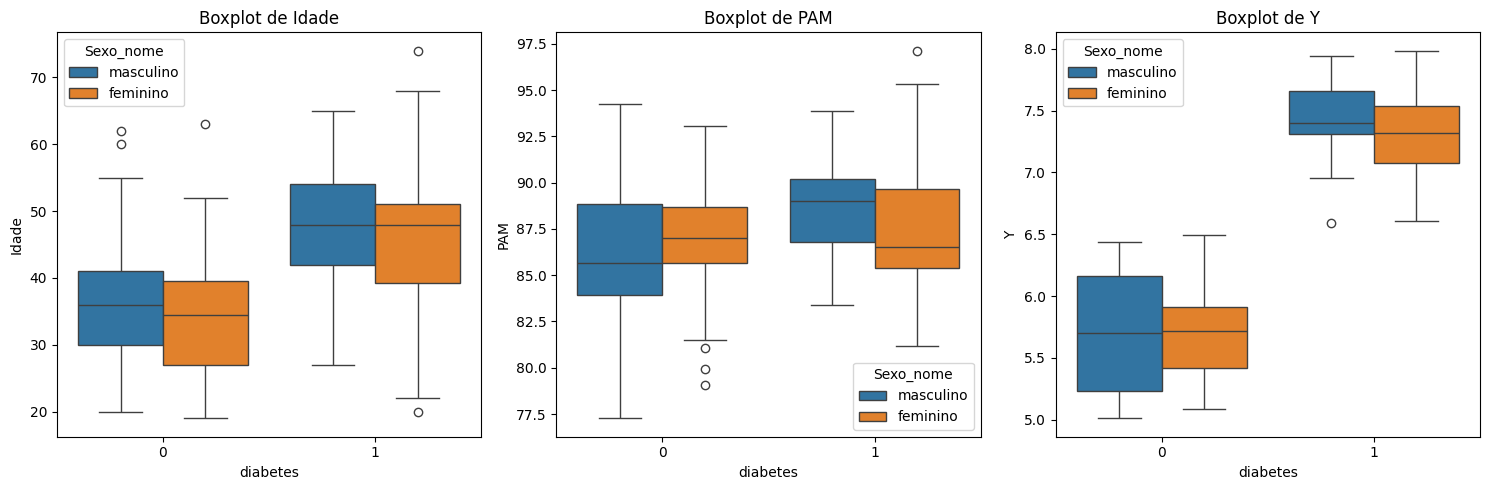

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos o ambiente de subplots com 1 linha e 3 colunas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Criamos um boxplot para 'Idade'
sns.boxplot(data=df, x='diabetes', y='Idade', hue='Sexo_nome', ax=axes[0])
axes[0].set_title('Boxplot de Idade')

# Criamos um boxplot para 'PAM'
sns.boxplot(data=df, x='diabetes', y='PAM', hue='Sexo_nome', ax=axes[1])
axes[1].set_title('Boxplot de PAM')

# Criamos um boxplot para 'Y'
sns.boxplot(data=df, x='diabetes', y='Y', hue='Sexo_nome', ax=axes[2])
axes[2].set_title('Boxplot de Y')

# Ajustamos o layout para evitar sobreposição
plt.tight_layout()

# Exibimos os gráficos
plt.show()


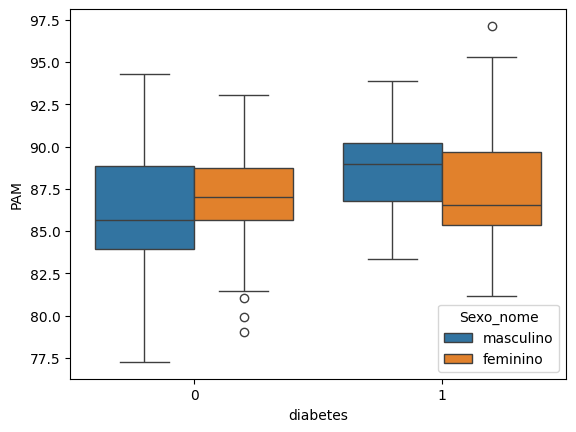

In [21]:
sns.boxplot(data=df, x='diabetes', y='PAM', hue='Sexo_nome');

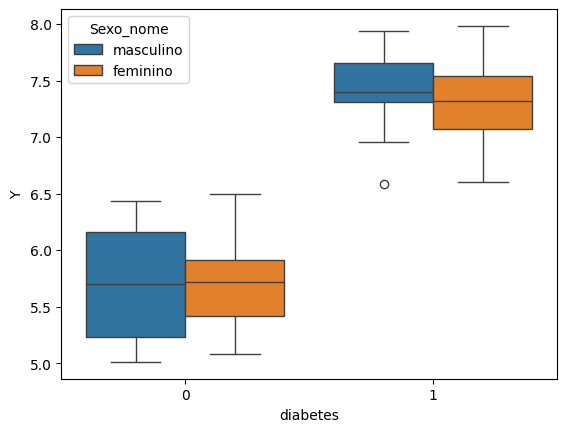

In [22]:
sns.boxplot(data=df, x='diabetes', y='Y', hue='Sexo_nome');

# 4. Modelo de regressão logística
(Alguns códigos são sugeridos. Inclua outros, se necessário, e responda às perguntas)

    Ajuste um modelo de regressão logística com intercepto para a resposta 'diabetes' com preditoras 'Idade', 'Sexo', 'IMC', 'PAM' e 'S'. Esse modelo é um MLG com resposta binomial e ligação logito. Avalie como as preditoras 'Idade' e 'IMC' influenciam na resposta 'diabetes' (sugestão: razão de chances, dada neste modelo por OR=exp(bj), em que bj é o coeficiente estimado correspondente à j-ésima preditora).



In [28]:
# Preditoras
preditoras = df[['Idade','Sexo', 'IMC', 'PAM', 'S']]
preditoras_com_intercepto = sm.add_constant(preditoras)

# Resposta
resposta = df['diabetes']

# Modelo de regressão logística com intercepto
glm_binom = sm.GLM(resposta, preditoras_com_intercepto, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               diabetes   No. Observations:                  150
Model:                            GLM   Df Residuals:                      144
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -65.379
Date:                Sun, 16 Jun 2024   Deviance:                       130.76
Time:                        19:33:49   Pearson chi2:                     144.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3867
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.2384      6.166     -3.120      0.0

In [29]:
# preditoras = df[['Idade', 'IMC']]
# preditoras_com_intercepto = sm.add_constant(preditoras)

# glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
# res = glm_binom.fit()
# print(res.summary())


Analisando a tabela de saída do seu modelo de regressão logística, podemos interpretar os resultados da seguinte maneira:


Intercepto (const): O coeficiente do intercepto é -19.2384 com um erro padrão de 6.166. O valor de z é -3.120, indicando que o intercepto é significativamente diferente de zero com um valor de p de 0.002. Isso sugere que, quando todas as outras variáveis são iguais a zero, a log odds de ter diabetes é -19.2384.


Idade: Para cada aumento de uma unidade na idade, espera-se que a log odds de ter diabetes aumente em 0.1088, mantendo todas as outras variáveis constantes. Este efeito é estatisticamente significativo com um valor de p de 0.000.


Sexo: O coeficiente para a variável Sexo é 1.0417, o que indica que, mantendo todas as outras variáveis constantes, o grupo referenciado por esse coeficiente (provavelmente feminino, se codificado como 1) tem uma log odds 1.0417 vezes maior de ter diabetes em comparação com o grupo base (provavelmente masculino, se codificado como 0). Este efeito também é estatisticamente significativo com um valor de p de 0.027.


IMC: O coeficiente de 0.2650 para o IMC sugere que um aumento de uma unidade no IMC está associado a um aumento na log odds de ter diabetes de 0.2650, mantendo todas as outras variáveis constantes. Este efeito é estatisticamente significativo com um valor de p de 0.000.


PAM: O coeficiente para PAM é 0.0572, mas com um valor de p de 0.390, o que indica que não há evidência suficiente para afirmar que PAM tem um efeito significativo sobre a probabilidade de ter diabetes neste modelo.


S: O coeficiente de 0.3500 para a variável S é estatisticamente significativo com um valor de p de 0.024, sugerindo que há uma associação positiva entre essa variável e a log odds de ter diabetes.


Os intervalos de confiança para cada coeficiente mostram a faixa dentro da qual podemos estar confiantes de que o verdadeiro valor do coeficiente se encontra, com um nível de confiança de 95%.
Lembre-se de que a interpretação dos coeficientes em um modelo de regressão logística é em termos de log odds. Para interpretar os efeitos em termos de odds ratio, você pode exponenciar os coeficientes. Por exemplo, o odds ratio para Sexo seria e1.0417
.
Espero que esta análise ajude a entender melhor os resultados do seu modelo. Se tiver mais perguntas ou precisar de esclarecimentos adicionais, estou à disposição para ajudar! Bold

In [30]:
res.get_hat_matrix_diag()

array([0.04762768, 0.05057606, 0.03363725, 0.06548283, 0.05867745,
       0.01318864, 0.04826742, 0.05968293, 0.07142614, 0.04709721,
       0.01921999, 0.00782808, 0.0458092 , 0.05220765, 0.04533866,
       0.04462392, 0.01416448, 0.0543925 , 0.25727424, 0.04782467,
       0.04197967, 0.02314173, 0.03727579, 0.03895864, 0.02108188,
       0.03923653, 0.05522949, 0.05444358, 0.02797343, 0.03988547,
       0.05741605, 0.0125974 , 0.04282442, 0.07159637, 0.03758404,
       0.02988487, 0.01368378, 0.02217623, 0.0294    , 0.01462523,
       0.06353054, 0.04003794, 0.05337462, 0.03393497, 0.09488281,
       0.05378084, 0.02533762, 0.01391649, 0.02881838, 0.03740437,
       0.02607861, 0.03050557, 0.02313892, 0.01829741, 0.03922164,
       0.04886115, 0.0263004 , 0.04740435, 0.07720496, 0.01148136,
       0.02579215, 0.0211087 , 0.02027452, 0.00624637, 0.02913569,
       0.10537497, 0.08130526, 0.05792631, 0.01382791, 0.02452362,
       0.01707974, 0.06355928, 0.0265135 , 0.04273469, 0.01362

**Interpretação dos coeficientes do modelo**

In [54]:
for col in df.columns:
    print(max(df[col]))

74
1
34.8933
97.1287
8.836
7.9836
1


TypeError: '>' not supported between instances of 'float' and 'str'

In [55]:
len(df)

150

150

# 5. Análise de pontos de alavanca
(Alguns códigos são sugeridos. Inclua outros, se necessário, e responda às perguntas)

    Desenvolva uma análise de pontos de alavanca e, caso haja alguma observação em destaque, identifique-a e investigue se ela contém algum comportamento inesperado.

**Análise de pontos de alavanca**

In [31]:
import plotly.express as px
fig = px.scatter(y=res.get_influence().hat_matrix_diag)
fig.show()

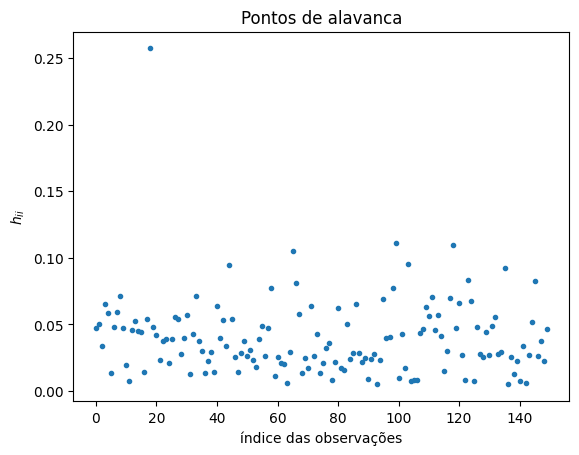

In [32]:
fig, ax = plt.subplots()

plt.plot(res.get_hat_matrix_diag(), '.')

ax.set_title('Pontos de alavanca')
ax.set_ylabel('$h_{ii}$')
ax.set_xlabel('índice das observações');

plt.show()

In [71]:
df.drop(df.index[18])

df.iloc[18]

# [['Idade','Sexo', 'IMC', 'PAM', 'S']]

Idade                  41
Sexo                    1
IMC               18.3682
PAM                95.312
S                   8.836
Y                   7.673
diabetes                1
faixas de IMC         NaN
Sexo_nome        feminino
Name: 622034, dtype: object

In [73]:
# Preditoras
df2 = df.drop(df.index[18])
preditoras = df2[['Idade','Sexo', 'IMC', 'PAM', 'S']]
preditoras_com_intercepto = sm.add_constant(preditoras)

# Resposta
resposta = df2['diabetes']

# Modelo de regressão logística com intercepto
glm_binom = sm.GLM(resposta, preditoras_com_intercepto, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               diabetes   No. Observations:                  149
Model:                            GLM   Df Residuals:                      143
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -64.271
Date:                Sun, 16 Jun 2024   Deviance:                       128.54
Time:                        20:38:36   Pearson chi2:                     144.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3906
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.9301      6.303     -2.686      0.0

In [74]:
fig = px.scatter(y=res.get_influence().hat_matrix_diag)
fig.show()

In [39]:
limiar_alavancagem = 2 * (preditoras_com_intercepto.shape[1]) / preditoras_com_intercepto.shape[0]
limiar_alavancagem

0.08

In [36]:
# Ajuste do modelo original
glm_binom = sm.GLM(resposta, preditoras_com_intercepto, family=sm.families.Binomial())
res = glm_binom.fit()

# Calculando as medidas de alavancagem
influencia = res.get_influence()
alavancagem = influencia.hat_matrix_diag

# Definindo um limiar para identificar pontos de alavanca
limiar_alavancagem = 2 * (preditoras_com_intercepto.shape[1]) / preditoras_com_intercepto.shape[0]

# Identificando os índices dos pontos de alavanca
indices_alavancagem = np.where(alavancagem > limiar_alavancagem)[0]

# Removendo os pontos de alavanca do conjunto de dados
df_sem_alavancagem = df.drop(df.index[indices_alavancagem])

# Preparando as preditoras e a resposta sem os pontos de alavanca
preditoras_sem_alavancagem = df_sem_alavancagem[['Idade', 'Sexo', 'IMC', 'PAM', 'S']]
preditoras_com_intercepto_sem_alavancagem = sm.add_constant(preditoras_sem_alavancagem)
resposta_sem_alavancagem = df_sem_alavancagem['diabetes']

# Retreinando o modelo sem os pontos de alavanca
glm_binom_sem_alavancagem = sm.GLM(resposta_sem_alavancagem, preditoras_com_intercepto_sem_alavancagem, family=sm.families.Binomial())
res_sem_alavancagem = glm_binom_sem_alavancagem.fit()

# Exibindo o sumário do novo modelo
print(res_sem_alavancagem.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               diabetes   No. Observations:                  140
Model:                            GLM   Df Residuals:                      134
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59.124
Date:                Sun, 16 Jun 2024   Deviance:                       118.25
Time:                        19:58:35   Pearson chi2:                     133.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3943
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.0381      6.954     -2.450      0.0

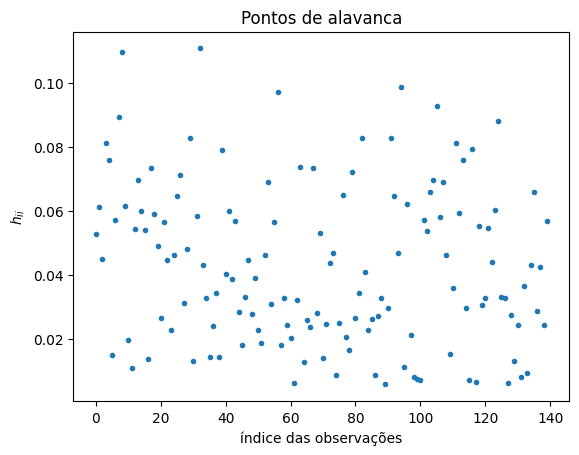

In [38]:
fig, ax = plt.subplots()

plt.plot(res_sem_alavancagem.get_hat_matrix_diag(), '.')

ax.set_title('Pontos de alavanca')
ax.set_ylabel('$h_{ii}$')
ax.set_xlabel('índice das observações');

plt.show()

In [49]:
fig = px.scatter(y=res_sem_alavancagem.get_hat_matrix_diag())
fig.show()